<a href="https://colab.research.google.com/github/Vey27/Deep-Learning-and-Computer-Vision/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Perceptron PyTorch**

## Creating Dataset

In [2]:
!pip3 install torch


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [4]:
#from numpy.random.mtrand import noncentral_chisquare
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]# create nested list
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4) # stored data points in X, y to train a model affectly classify a data into different classes. Seed number generator
print(X)
print(y)

[[-0.13715792 -0.07147228]
 [ 0.80437976 -0.37061246]
 [-0.60224775 -0.61943564]
 [ 0.57087693 -0.5119872 ]
 [ 0.0063745   0.15330384]
 [-0.87433355  0.97033162]
 [ 0.19742512 -0.37132537]
 [-0.6340043   0.91244578]
 [-0.48180397  0.40676318]
 [ 0.19748489  0.18077491]
 [-0.62590326  0.06563904]
 [-0.31262435  0.16753801]
 [-0.1085056   1.39525734]
 [ 0.09825765  0.92775707]
 [-0.36456438  0.4952678 ]
 [ 0.75682188 -1.29115517]
 [ 0.33484534  0.56577649]
 [-0.66134642  0.44958817]
 [ 0.34335208 -0.44400876]
 [-0.42758595  0.97114478]
 [-0.09837844  0.65447456]
 [ 0.45694611  0.66516486]
 [-0.12901503  0.43054573]
 [ 0.67045866 -1.1421639 ]
 [ 0.82493653 -0.30010394]
 [ 0.72261948 -0.58483205]
 [-0.49886163  0.77528908]
 [-0.03991778 -0.00694082]
 [ 1.05814117 -0.64357437]
 [ 0.60152659 -0.38650986]
 [ 0.57181979 -1.24479028]
 [-0.20505257  1.09629281]
 [ 1.14347639 -0.60809296]
 [-0.97932046  0.57980963]
 [ 0.20367449 -0.4708371 ]
 [-0.79298479  0.01499075]
 [ 0.5081264  -0.57758555]
 

Produced 2D numpy, lables are 0 and 1 representing two classes
The code above generates a dataset using the make_blobs function from the sklearn.datasets module. The dataset consists of n_pts (100) points with two clusters, each centered at [-0.5, 0.5] and [0.5, -0.5] respectively, with a standard deviation of 0.4. The resulting dataset is stored in two variables: X contains the features (the points) and y contains the labels (the cluster each point belongs to).

The print statements simply display the contents of X and y. X is a 2D array with 100 rows and 2 columns, where each row represents a point and each column represents a feature. y is a 1D array with 100 elements, where each element represents the label (0 or 1) of the corresponding point in X.

The resulting dataset can be used to train a machine learning model, such as a perceptron, to classify new data points into one of the two clusters.

In [5]:
#from numpy.random.mtrand import noncentral_chisquare
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]# create nested list
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4) # stored data points in X, y to train a model affectly classify a data into different classes. Seed number generator
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(100, 1))


In [6]:

def scatter_plot():
  plt.scatter(X[y==0, 0], X[y==0, 1])
  plt.scatter(X[y==1, 0], X[y==1, 1])

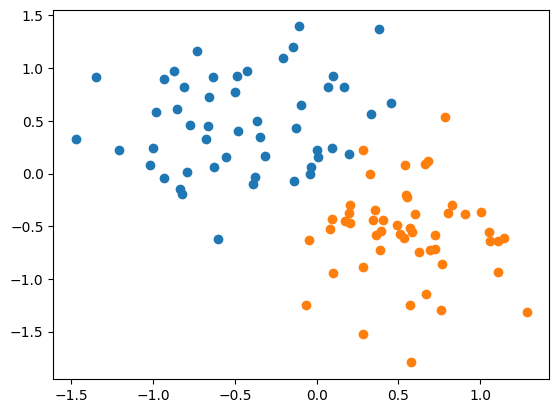

In [7]:
scatter_plot()

## Perceptron Model
Classification predict by determine if someone is diabetic or not diabetic determine based on their age on the X and blood glucose level on the y. Trends can be seen. The lower their blood sugar level and age more likely to follow in the lower risks of becoming diabetic labe of 1. Higher the age and blood sugar level is 0 indicating higher risks of becoming diabetic. Concluded that a computer cannot make this prediction. It will start with random model and train with optimizer. 

### Model Setup

In [8]:

#linear model
class Model(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
      pred = torch.sigmoid(self.linear(x))
      return pred 
    def predict(self, x):
      pred = self.forward(x)
      if pred  >= 0.5:
        return 1
      else:
        return 0

In [9]:
torch.manual_seed(2)
model = Model(2, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [10]:
#unpacking
[w,b] = model.parameters()
w1, w2 = w.view(2)
def get_params():
  return(w1.item(), w2.item(), b[0].item())


In [11]:
def plot_fit(title):
    plt.title=(title)
    w1, w2, b1 = get_params()
    x1 = np.array([-2.0, 2.0])
    x2 = (w1*x1 + b1)/-w2
    plt.plot(x1, x2, 'r')
    scatter_plot()


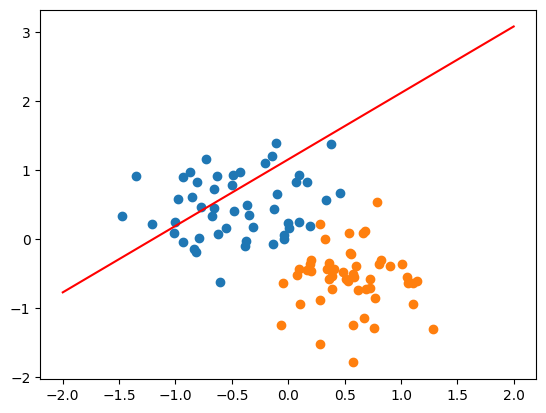

In [12]:
plot_fit('Initial Model')

## Model Training

In [ ]:
#from torch.nn.modules.loss import BCELoss
#criterion = nn.BCELoss
#optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)


In [13]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) #Learning rate

In [14]:
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred,y_data)
  print('epoch:', i, 'loss', loss.item())
  
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
 

epoch: 0 loss 0.6185115575790405
epoch: 1 loss 0.6134997010231018
epoch: 2 loss 0.608543336391449
epoch: 3 loss 0.6036437153816223
epoch: 4 loss 0.5988013744354248
epoch: 5 loss 0.5940170884132385
epoch: 6 loss 0.5892913937568665
epoch: 7 loss 0.584624707698822
epoch: 8 loss 0.5800174474716187
epoch: 9 loss 0.5754699110984802
epoch: 10 loss 0.5709819793701172
epoch: 11 loss 0.5665537118911743
epoch: 12 loss 0.5621849298477173
epoch: 13 loss 0.5578753352165222
epoch: 14 loss 0.5536245107650757
epoch: 15 loss 0.5494317412376404
epoch: 16 loss 0.5452964305877686
epoch: 17 loss 0.5412176251411438
epoch: 18 loss 0.5371946096420288
epoch: 19 loss 0.5332261323928833
epoch: 20 loss 0.5293110609054565
epoch: 21 loss 0.5254483819007874
epoch: 22 loss 0.5216367840766907
epoch: 23 loss 0.5178748965263367
epoch: 24 loss 0.5141614675521851
epoch: 25 loss 0.5104953646659851
epoch: 26 loss 0.5068749785423279
epoch: 27 loss 0.503299355506897
epoch: 28 loss 0.4997672140598297
epoch: 29 loss 0.4962775111

Text(0.5, 0, 'epoch')

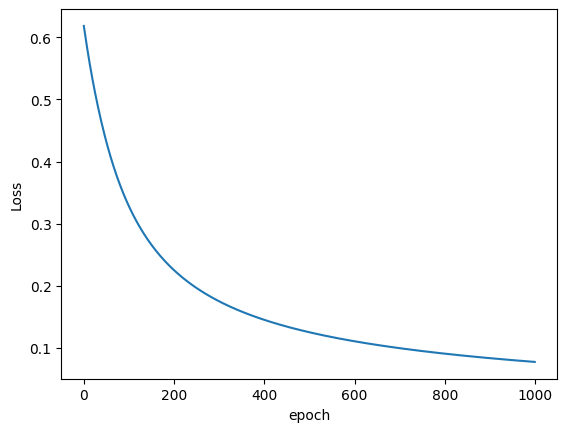

In [15]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

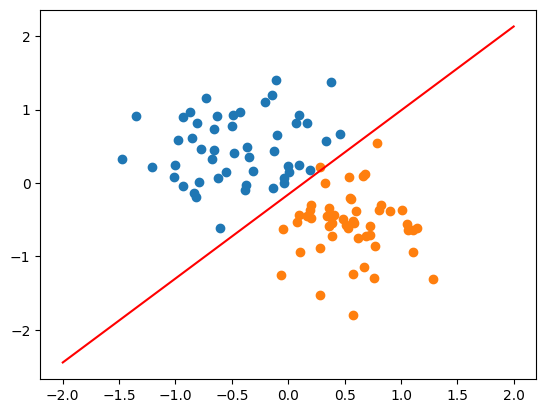

In [16]:
plot_fit('Trained Model')

## Model Testing 

Red point positive probability = 0.9995723366737366
Black point positive probability = 0.00012562588381115347
Red point positive class 1
Black point positive class 0


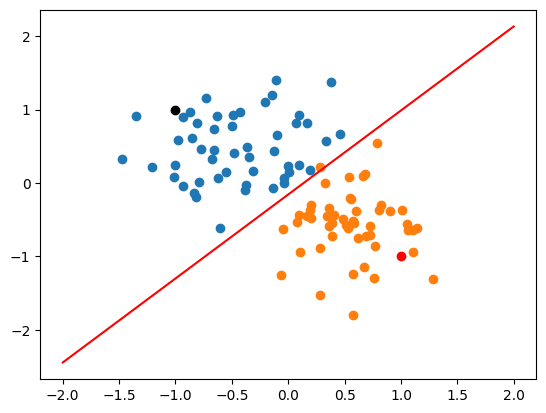

In [17]:
point1 = torch.Tensor([1.0, -1.0])
point2 = torch.Tensor([-1.0, 1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], 'ro')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')
print('Red point positive probability = {}'.format(model.forward(point1).item()))
print('Black point positive probability = {}'.format(model.forward(point2).item()))
print('Red point positive class {}'.format(model.predict(point1)))
print('Black point positive class {}'.format(model.predict(point2)))
plot_fit('Trained Model')

# Deep Neural Networks Pytorch

In [18]:
n_pts = 500
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2)# 20% of outer circle
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(500,1))

In [19]:
def scatter_plot():
  plt.scatter(X[y==0,0], X[y==0,1])
  plt.scatter(X[y==1,0], X[y==1,1])

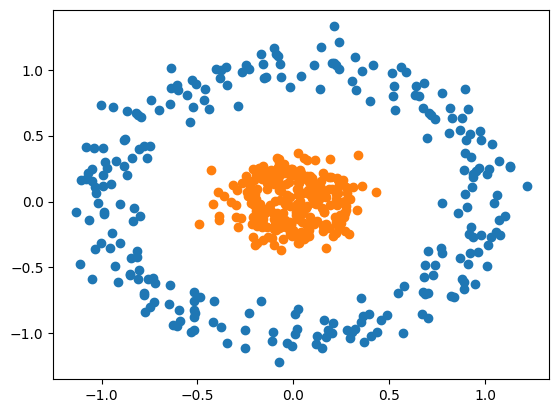

In [20]:
scatter_plot()

More complex dataset

In [21]:
class Model(nn.Module):
    def __init__(self, input_size, output_size):
      super().__init__() 
      self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
      pred = torch.sigmoid(self.linear(x))
      return pred
    def predict(self, x):
      pred = self.forward(x)
      if pred >= 0.5:
        return 1
      else:
        return 0

In [22]:
torch.manual_seed(2)
model = Model(2, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [23]:
[w, b] = model.parameters()
w1, w2 = w.view(2)
def get_params():
  return (w1.item(), w2.item(), b[0].item())

In [24]:
def plot_fit(title):
  plt.title = title
  w1, w2, b1 = get_params()
  x1 = np.array([-2, 2])
  x2 = (w1*x1 + b1)/(-w2)
  plt.plot(x1, x2, 'r')
  scatter_plot()
  plt.show()

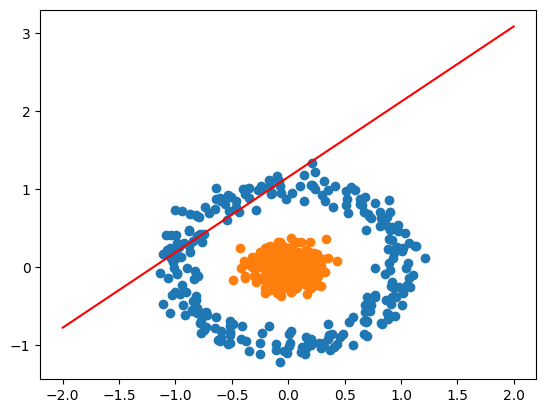

In [25]:
plot_fit('Initial Model')

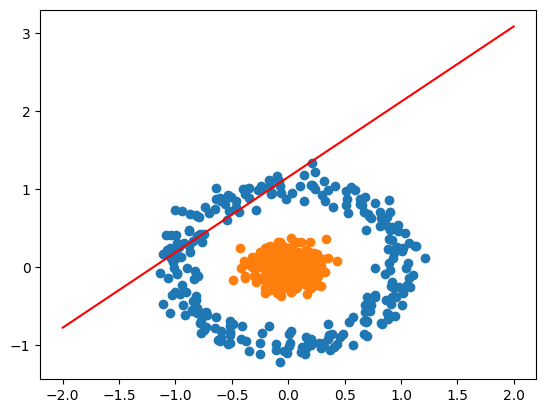

In [26]:
plot_fit('Initial Model')

In [27]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [28]:
epochs = 1000
losses = []

for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print("epoch:", i, "loss:", loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss: 0.699214518070221
epoch: 1 loss: 0.6991896033287048
epoch: 2 loss: 0.6991647481918335
epoch: 3 loss: 0.6991400718688965
epoch: 4 loss: 0.699115514755249
epoch: 5 loss: 0.6990910172462463
epoch: 6 loss: 0.6990666389465332
epoch: 7 loss: 0.6990423798561096
epoch: 8 loss: 0.6990182399749756
epoch: 9 loss: 0.6989941596984863
epoch: 10 loss: 0.6989701986312866
epoch: 11 loss: 0.6989464163780212
epoch: 12 loss: 0.6989227533340454
epoch: 13 loss: 0.6988992094993591
epoch: 14 loss: 0.6988756060600281
epoch: 15 loss: 0.6988523006439209
epoch: 16 loss: 0.6988290548324585
epoch: 17 loss: 0.6988058686256409
epoch: 18 loss: 0.6987828016281128
epoch: 19 loss: 0.698759913444519
epoch: 20 loss: 0.6987370848655701
epoch: 21 loss: 0.6987143158912659
epoch: 22 loss: 0.6986916661262512
epoch: 23 loss: 0.6986690759658813
epoch: 24 loss: 0.6986466646194458
epoch: 25 loss: 0.6986243724822998
epoch: 26 loss: 0.6986021995544434
epoch: 27 loss: 0.6985800266265869
epoch: 28 loss: 0.698558032512664

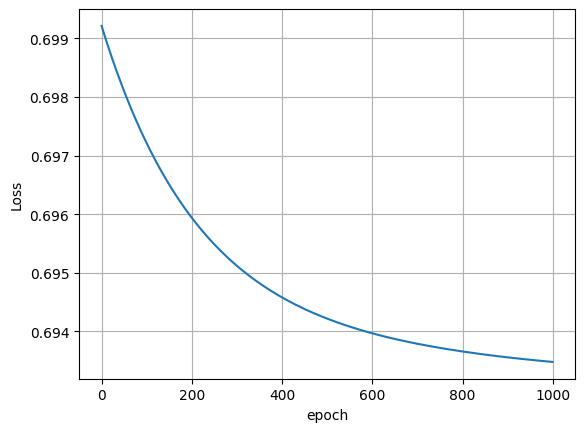

In [29]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.grid()

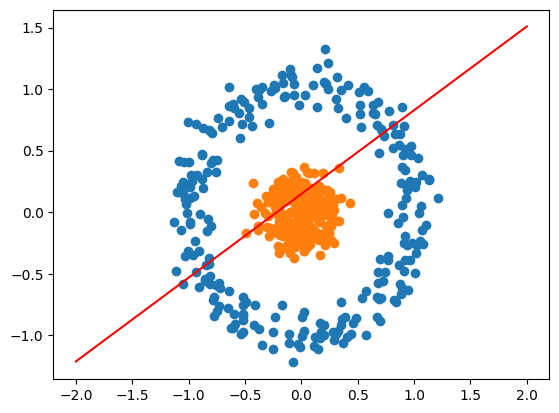

In [30]:
plot_fit("Trained Model")

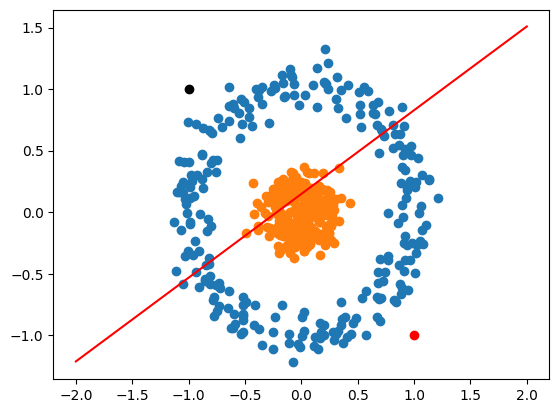

Red point positive probability = 0.5505043864250183
Black point positive probability = 0.4576415419578552
Red point belongs in class 1
Black point belongs in class = 0


In [31]:
point1 = torch.Tensor([1.0, -1.0])
point2 = torch.Tensor([-1.0, 1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], 'ro')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')
plot_fit("Trained Model")
print("Red point positive probability = {}".format(model.forward(point1).item())) 
print("Black point positive probability = {}".format(model.forward(point2).item())) 
print("Red point belongs in class {}".format(model.predict(point1))) 
print("Black point belongs in class = {}".format(model.predict(point2))) 